In [47]:
from matplotlib import pyplot as plt
import numpy as np
import math as mt
import pandas as pd
from sympy import *

In [48]:
Pw1=40/120
Pw2=40/120
Pw3=40/120

In [49]:
data_frame=pd.read_csv('Iris.csv')
data_frame=data_frame.iloc[:,3:5]
tf1=data_frame.iloc[40:50,:]
tf2=data_frame.iloc[90:100,:]
tf3=data_frame.iloc[140:150,:]
tf=[tf1,tf2,tf3] 
test_frame=pd.concat(tf)
class_frame1=data_frame.iloc[0:40,:]
class_frame2=data_frame.iloc[50:90,:]
class_frame3=data_frame.iloc[100:140,:]

In [50]:
def mean(class_frame):
     mean = class_frame.mean().values
     return np.asarray(mean)

In [51]:
u1=mean(class_frame1)
u2=mean(class_frame2)
u3=mean(class_frame3)
print("u1 = ",u1)
print("u2 = ",u2)
print("u3 = ",u3)

u1 =  [1.4625 0.2325]
u2 =  [4.3175 1.35  ]
u3 =  [5.6075 1.99  ]


In [52]:
def get_cov(class_frame):
     return np.asarray(class_frame.cov().values)

In [53]:
Σ1=get_cov(class_frame1)
Σ2=get_cov(class_frame2)
Σ3=get_cov(class_frame3)
print("Σ1 = \n",Σ1)
print("Σ2 = \n",Σ2)
print("Σ3 = \n",Σ3)

Σ1 = 
 [[0.02958333 0.00458333]
 [0.00458333 0.00994231]]
Σ2 = 
 [[0.20353205 0.07371795]
 [0.07371795 0.04307692]]
Σ3 = 
 [[0.34532692 0.05930769]
 [0.05930769 0.07425641]]


In [54]:
def class_cond_probab(X,u,Σ):
     Σinv=np.linalg.inv(Σ)
     X_minus_uT=X-u
     X_minus_u=np.transpose(X_minus_uT)
     d1=np.dot(Σinv,X_minus_u)
     d2=np.dot(X_minus_uT,d1)
     return 1/(2*(np.pi**2)*sqrt(abs(np.linalg.det(np.linalg.inv(Σinv)))))*mt.exp((-1/2)*np.dot(X_minus_uT,np.dot(Σinv,X_minus_u)))

In [55]:
def classify(posterior_probab):
     i=posterior_probab.index(max(posterior_probab))
     if i==0:
          return 'Iris-setosa',i
     elif i==1:
          return 'Iris-versicolor',i
     else:
          return 'Iris-virginica',i

In [56]:
error=0
for i in range (30):
     X=np.asarray(test_frame.iloc[i,:])
     p1=class_cond_probab(X,u1,Σ1)*Pw1
     p2=class_cond_probab(X,u2,Σ2)*Pw2
     p3=class_cond_probab(X,u3,Σ3)*Pw3
     p=p1+p2+p3
     posterior_probab=[p1/p,p2/p,p3/p]
     res,j=classify(posterior_probab)
     if i in range(0,9):
          if(j!=0): 
               error+=1
     if i in range(10,19):
          if(j!=1): 
               error+=1
     if i in range(20,29):
          if(j!=2): 
               error+=1
     print("Test flower",i+1,"is classified into the class",res)
accuracy=(1-error/30)*100
print("The accuracy of classification is",accuracy,"%")

Test flower 1 is classified into the class Iris-setosa
Test flower 2 is classified into the class Iris-setosa
Test flower 3 is classified into the class Iris-setosa
Test flower 4 is classified into the class Iris-setosa
Test flower 5 is classified into the class Iris-setosa
Test flower 6 is classified into the class Iris-setosa
Test flower 7 is classified into the class Iris-setosa
Test flower 8 is classified into the class Iris-setosa
Test flower 9 is classified into the class Iris-setosa
Test flower 10 is classified into the class Iris-setosa
Test flower 11 is classified into the class Iris-versicolor
Test flower 12 is classified into the class Iris-versicolor
Test flower 13 is classified into the class Iris-versicolor
Test flower 14 is classified into the class Iris-versicolor
Test flower 15 is classified into the class Iris-versicolor
Test flower 16 is classified into the class Iris-versicolor
Test flower 17 is classified into the class Iris-versicolor
Test flower 18 is classified 

In [57]:
def get_g(X,u,Σ):
    Σinv=np.linalg.inv(Σ)
    X_minus_uT=X-u
    X_minus_u=np.transpose(X_minus_uT)
    return (-1/2)*np.dot(X_minus_uT,np.dot(Σinv,X_minus_u))+(-1/2)*log(np.linalg.det(Σ))    #Pw1=Pw2=Pw3

In [58]:
x=Symbol('x')
y=Symbol('y')
X=[x,y]

In [59]:
gx1=get_g(X,u1,Σ1)
print("Discriminant Function 1: g1(w,x,y,z) =",gx1,'\n')
gx2=get_g(X,u2,Σ2)
print("Discriminant Function 2: g2(w,x,y,z) =",gx2,'\n')
gx3=get_g(X,u3,Σ3)
print("Discriminant Function 3: g3(w,x,y,z) =",gx3,'\n')

Discriminant Function 1: g1(w,x,y,z) = -0.5*(x - 1.4625)*(36.4027538726334*x - 16.7814113597246*y - 49.3373493975903) - 0.5*(y - 0.2325)*(-16.7814113597246*x + 108.316382412768*y - 0.640744797371315) + 4.10280027533882 

Discriminant Function 2: g2(w,x,y,z) = -0.5*(x - 4.3175)*(12.9235994749295*x - 22.1162788633465*y - 25.9406642674901) - 0.5*(y - 1.35)*(-22.1162788633465*x + 61.0620843643579*y + 13.0532201006155) + 2.85191145469936 

Discriminant Function 3: g3(w,x,y,z) = -0.5*(x - 5.6075)*(3.35617106951655*x - 2.68053303998335*y - 13.4854685227472) - 0.5*(y - 1.99)*(-2.68053303998335*x + 15.6077599866994*y - 16.0283533518252) + 1.9055159665711 



The Decision Boundary g1-2 is : y = -0.112896979194497*x - 0.9616716137733*sqrt(-0.523481791246906*x**2 + x + 0.653122003895383) + 0.289793002193321 

The Decision Boundary g1-3 is: y = 0.152098887360624*x - 0.850259507069334*sqrt(-0.461064227294499*x**2 + x + 0.629037631834874) - 0.165978181443963 

The Decision Boundary g2-3 is : y = 0.427588487772488*x - 0.860259796766389*sqrt(-0.0373659197881672*x**2 + 0.00120396753148487*x + 1) - 0.639797727732472 



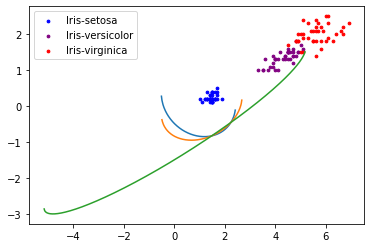

In [60]:
np.seterr(invalid='ignore')
x1=class_frame1['PetalLengthCm']
y1=class_frame1['PetalWidthCm']
x2=class_frame2['PetalLengthCm']
y2=class_frame2['PetalWidthCm']
x3=class_frame3['PetalLengthCm']
y3=class_frame3['PetalWidthCm']
g12=solve(gx1-gx2,y,dict=True)
print("The Decision Boundary g1-2 is : y =",g12[0][y],'\n')
xx=np.linspace(-10, 10, 1000)
yy=[lambdify(x,g12[0][y])(val) for val in xx]
plt.plot(xx,np.transpose(yy))
g13=solve(gx1-gx3,y,dict=True)
print("The Decision Boundary g1-3 is: y =",g13[0][y],'\n')
xx=np.linspace(-10, 10, 1000)
yy=[lambdify(x,g13[0][y])(val) for val in xx]
plt.plot(xx,np.transpose(yy))
g23=solve(gx2-gx3,y,dict=True)
print("The Decision Boundary g2-3 is : y =",g23[0][y],'\n')
xx=np.linspace(-10, 10, 1000)
yy=[lambdify(x,g23[0][y])(val) for val in xx]
plt.plot(xx,np.transpose(yy))
plt.scatter(x1,y1,label="Iris-setosa",color="blue",marker=".",s=30)
plt.scatter(x2,y2,label="Iris-versicolor",color="purple",marker=".",s=30) 
plt.scatter(x3,y3,label="Iris-virginica",color="red",marker=".",s=30) 
plt.legend()
plt.show()